## inserting the KITTI - Object Detection
Detect and localize multiple Classes in images
 
KITTI Object Detection with Bounding Boxes – Taken from the benchmark suite from the Karlsruhe Institute of Technology, this dataset consists of images from the object detection section of that suite. This image dataset includes over 14,000 images made up of 7,518 testing images and 7,481 training images with bounding boxes labels in a separate file.
 
https://www.kaggle.com/twaldo/kitti-object-detection

# First of all get The **kaggle.json** file from this link, as you can see blowe:


```
*   https://www.kaggle.com/<your Account>/account

```



![enter image description here](https://i.stack.imgur.com/Uz4KW.png)

Then Upload the **kaggle.json** by Blow code:


In [1]:
from google.colab import files
files.upload()
 

Saving kaggle.json to kaggle.json
404 - Not Found


In [3]:
!mkdir -p ~/.kaggle
 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
 
 
!pip install kaggle 
#!sudo apt install kaggle 
!kaggle datasets download -d techsash/waste-classification-data

 99% 424M/427M [00:04<00:00, 114MB/s]
100% 427M/427M [00:04<00:00, 98.8MB/s]


## Location of the Images:
![enter image description here](https://i.stack.imgur.com/uOScc.png)






In [4]:
!ls
!unzip /content/waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

# Seeing the Kitti databse contents

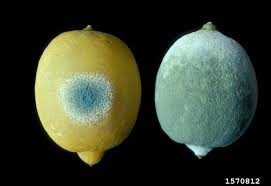

In [10]:
from IPython.display import Image
Image('/content/DATASET/TRAIN/O/O_10000.jpg')

In [11]:
# !cat /content/kitti_single/training/label_2/000000.txt

Youcan run the dataset by using the codes from This kaggle dataset community:

https://www.kaggle.com/bargaz/pytorch-waste-classification-vgg16


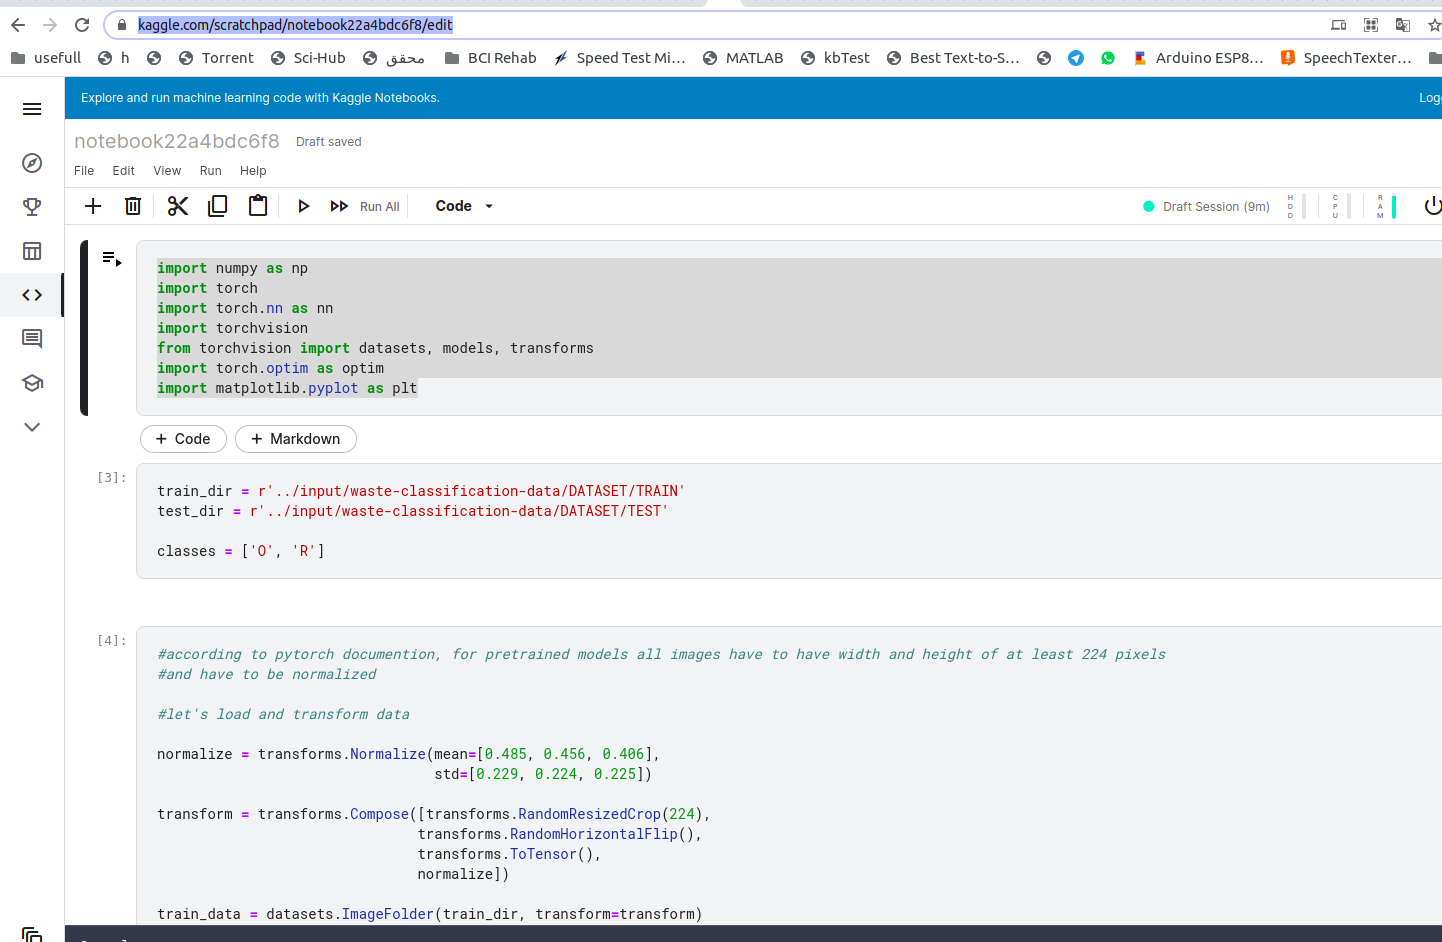




---



In [12]:
import numpy as np
import torch    
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [13]:
train_dir = r'/content/DATASET/TRAIN'
test_dir = r'/content/DATASET/TEST'

classes = ['O', 'R']

In [14]:
#according to pytorch documention, for pretrained models all images have to have width and height of at least 224 pixels
#and have to be normalized

#let's load and transform data

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

transform = transforms.Compose([transforms.RandomResizedCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               normalize])

train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

#now check if they've loaded correctly
print("Number of train images: ", (len(train_data)))
print("Number of test images: ", len(test_data))

Number of train images:  22564
Number of test images:  2513


In [15]:
#prepare data loaders
batch_size = 20

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

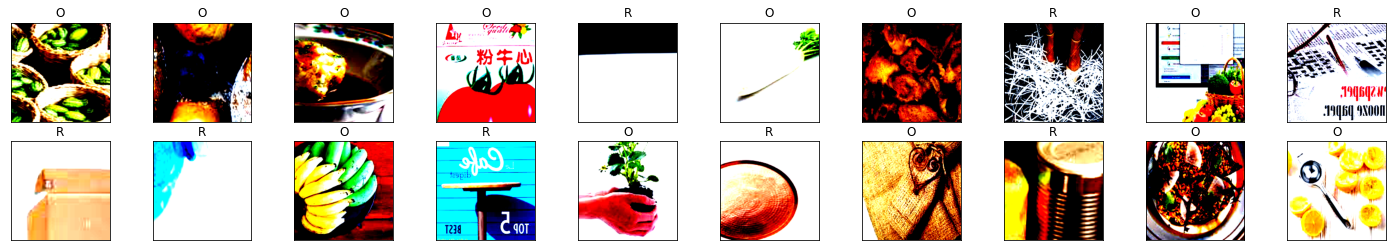

In [16]:
#let's visualize one batch of training data

dataiter = iter(train_loader)
images, labels = dataiter.next()
images.numpy() #convert images to numpy

#plot images with corresponding labels

fig = plt.figure(figsize=(25, 4))
for image in range(batch_size):
    ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[image], (1, 2, 0)))
    ax.set_title(classes[labels[image]])

In [17]:
# download pretrained model, vgg16

vgg16 = models.vgg16(pretrained=True)

# check model's architecture
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [18]:
# now we need to freeze the model's parameters, so it acts as a fixed feature extractor and then
# we'll replace last linear layer so that it'll have only 2 out_features -> the number of our classes

for param in vgg16.features.parameters():
    param.requires_grad = False

# access the last layer in the net
n_inputs = vgg16.classifier[6].in_features

# create new layer to have original number of in_features and out_features equal to number of classes we have in our data
last_layer = nn.Linear(n_inputs, len(classes))

# overwrite last layer with our layer
vgg16.classifier[6] = last_layer

# check if it's correct
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [19]:
#final thing before training is to specify loss function, optimzier and learning rate

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer and learning rate = 0.001
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

In [20]:
# if GPU is available, move the model to GPU
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    vgg16.cuda()

In [ ]:
#train the network

n_epochs = 1

for epoch in range(1, n_epochs + 1):
    
    #vgg16 by default is in train() mode so we don't have to use this method here
    
    #keep track of training loss
    train_loss = 0
    
    for batch_i, (data, target) in enumerate(train_loader):
        
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
           
        optimizer.zero_grad()             #clear the gradients
        output = vgg16(data)              #do the forward pass
        loss = criterion(output, target)  #calculate loss
        loss.backward()                   #do the backward pass
        optimizer.step()                  #perform parameter update
        train_loss += loss.item()         #update training loss
        
        if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0

Epoch 1, Batch 20 loss: 0.6140330418944359
Epoch 1, Batch 40 loss: 0.4634033381938935
Epoch 1, Batch 60 loss: 0.3795114010572433
Epoch 1, Batch 80 loss: 0.3541403047740460
Epoch 1, Batch 100 loss: 0.3573788419365883
Epoch 1, Batch 120 loss: 0.3117200098931789
Epoch 1, Batch 140 loss: 0.2993869766592979
Epoch 1, Batch 160 loss: 0.3215916380286217
Epoch 1, Batch 180 loss: 0.2936969049274921
Epoch 1, Batch 200 loss: 0.3468004815280438
Epoch 1, Batch 220 loss: 0.2900550160557032
Epoch 1, Batch 240 loss: 0.2855790633708238
Epoch 1, Batch 260 loss: 0.3064460456371307
Epoch 1, Batch 280 loss: 0.2783194914460182
Epoch 1, Batch 300 loss: 0.2913503717631102
Epoch 1, Batch 320 loss: 0.2731701169162989
Epoch 1, Batch 340 loss: 0.2842213008552790
Epoch 1, Batch 360 loss: 0.2278627134859562
Epoch 1, Batch 380 loss: 0.2430452663451433
Epoch 1, Batch 400 loss: 0.2377175994217396
Epoch 1, Batch 420 loss: 0.2581320792436600
Epoch 1, Batch 440 loss: 0.2514683380723000


In [ ]:
#test the network

test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))

vgg16.eval() # now we need to switch to eval mode

for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    
    output = vgg16(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    
    
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)  
    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    # calculate test accuracy for each object class
    try:
        for i in range(20):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
    except:
        for i in range(13):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

In [ ]:
#visualize results

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = vgg16(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for image in range(batch_size):
    ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[image].cpu(), (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[image]], classes[labels[image]]),
                 color=("green" if preds[image]==labels[image].item() else "red"))